In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
len(df)

11914

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory Data Analysis

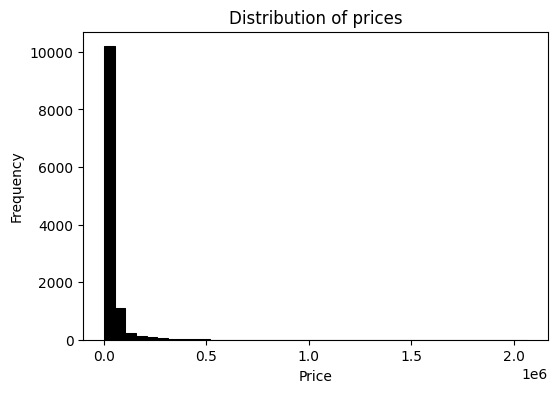

In [6]:
plt.figure(figsize=(6,4))

sns.histplot(df.msrp, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

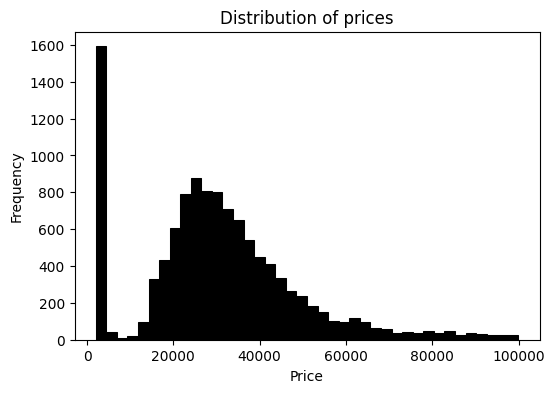

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

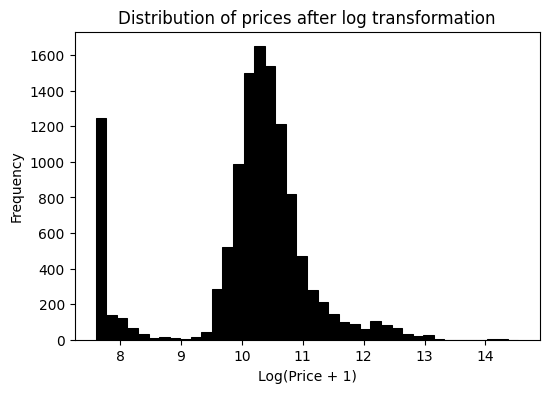

In [8]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log transformation')

plt.show()

In [9]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Validation Framework

In [10]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [11]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [12]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 7557, dtype: object

### Linear Regression

In [13]:
xi = [453, 11, 86]

In [14]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [15]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [16]:
linear_regression(xi)

12.312

In [17]:
np.expm1(12.312)

222347.2221101062

In [18]:
np.log1p(222347.2221101062)

12.312

### Linear Regression Vector Form

In [19]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [20]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [21]:
w_new = [w0] + w

In [22]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [23]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [24]:
linear_regression(xi)

12.312

In [25]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [26]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

### Train a Linear Regression Model

In [38]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
] 

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [28]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
X = np.column_stack([ones, X])

In [30]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [31]:
XTX = X.T.dot(X)

In [32]:
XTX_inv = np.linalg.inv(XTX)

In [33]:
w_full = XTX_inv.dot(X.T).dot(y)

In [34]:
w0 = w_full[0]
w = w_full[1:]

In [35]:
w0, w

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [39]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [40]:
train_linear_regression(X, y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

### Car Price Baseline Model

In [41]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [43]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

In [44]:
X_train = df_train[base].values

In [45]:
X_train = df_train[base].fillna(0).values

In [46]:
w0, w = train_linear_regression(X_train, y_train)

In [47]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

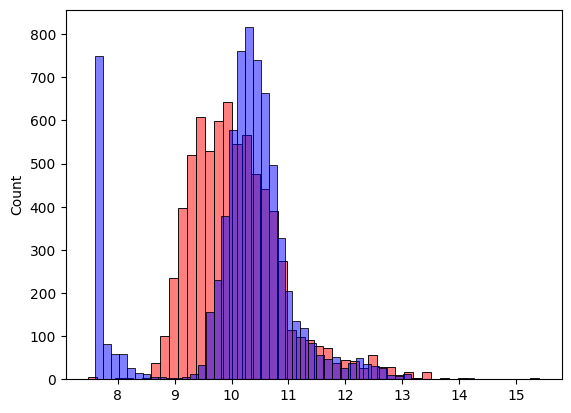

In [48]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### RMSE

In [49]:
def rmse(y, y_pred):
    se = ( y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [50]:
rmse(y_train, y_pred)

0.7554192603920132

### Validating the Model

In [51]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [52]:
# Train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Root Mean Squared Error
rmse(y_val, y_pred)

0.761653099130156

### Simple Feature Engineering

In [54]:
df = 2017 - df_train.year

In [55]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [56]:
# Train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Root Mean Squared Error
rmse(y_val, y_pred)

0.5172055461058299

<Axes: ylabel='Count'>

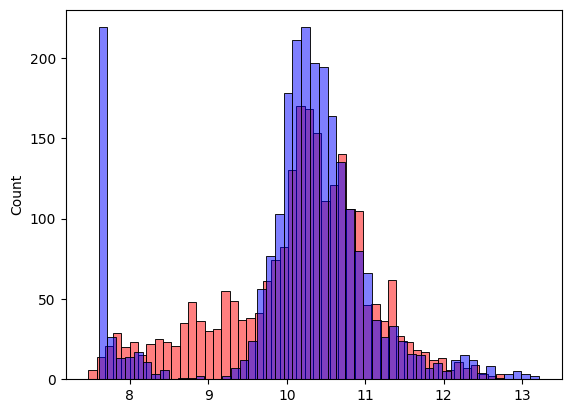

In [57]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

### Categorical Variables

In [58]:
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [59]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [60]:
# Train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Root Mean Squared Error
rmse(y_val, y_pred)

KeyError: "['num_doors_2', 'num_doors_3', 'num_doors_4'] not in index"